<a href="https://colab.research.google.com/github/AndresTombe/python/blob/main/Pr%C3%A1ctica_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Integrantes:
##### Leider Andres Tombe Morales
##### Gillian Valentina Beltrán Martínez

## ** Práctica Python**

El siguiente conjunto de datos agronómicos permite usar la misma entrada para ajustar diferentes modelos haciendo uso esta vez del programa Python:

La matriz de datos contiene las variables:

* y: latitud

* x:Longitud

* SMI: Índice de humedad del suelo

* NDVI: Índice de vegetación de diferencia normalizado

* LST: Temperatura en la superficie del suelo

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random
import scipy as sc
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import scipy.spatial as sp
import seaborn as sns
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
from plotly import express as px
%matplotlib inline

1- Convertir el código de R en Python par agenerar un data.frame de manera análoga.

In [ ]:
from numpy.ma.core import size
np.random.seed(1064436377)
Seqlat = np.arange(-73.30,-73.25,.001)
Seqlong = np.arange(5.54, 5.58, .001)
Latitude = pd.DataFrame.sample(pd.DataFrame(Seqlat), 100, replace = True)
Latitude = list(Latitude[0])
Longitude = pd.DataFrame.sample(pd.DataFrame(Seqlong), 100, replace = True)
Longitude = list(Longitude[0])

SMI= np.partition(np.random.uniform(0.7, 0.95, 100), 10)
NDVI= np.partition(np.random.uniform(0.45, 0.06, 100), 10)
LST= np.partition(26* sc.stats.beta.rvs(0.87, 0.91, size = 100), 10)

df1 = pd.DataFrame({"Lat":Latitude, "Lon":Longitude, "SMI":SMI, "NDVI":NDVI, "LST":LST})
df1["Posición"] = np.arange(len(df1))

print(df1.head())

      Lat    Lon       SMI      NDVI       LST  Posición
0 -73.277  5.571  0.717968  0.105301  0.501482         0
1 -73.285  5.554  0.711805  0.088773  0.381553         1
2 -73.262  5.540  0.727399  0.072618  0.203290         2
3 -73.278  5.553  0.724134  0.102362  0.064006         3
4 -73.294  5.578  0.702849  0.080127  1.630114         4


2- Graficar la nube de puntos (Solo coordenadas)

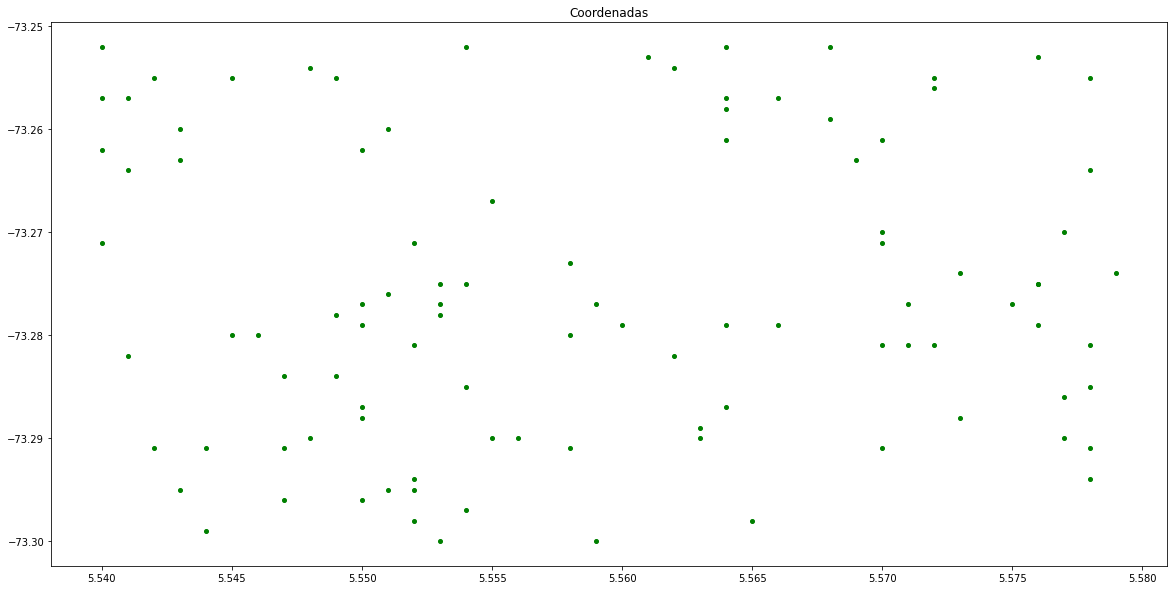

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(Longitude,Latitude,'o',markersize=4, color="green")
plt.title('Coordenadas')
plt.show()

3-	Asignar al gráfico un tamaño al punto de acuerdo con el SMI

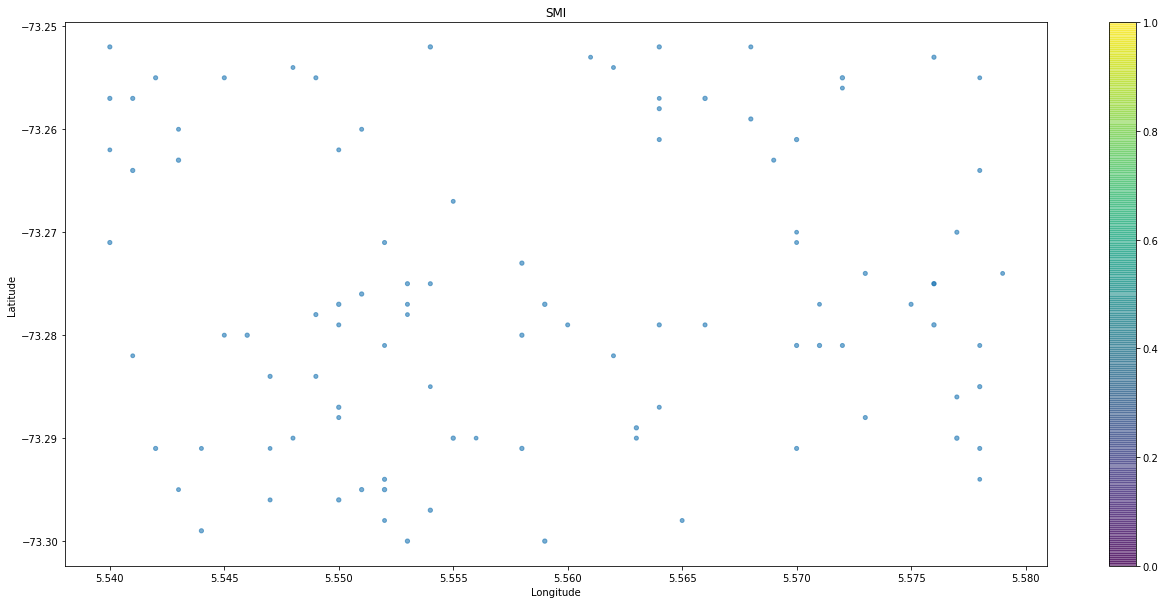

In [ ]:
x = Longitude
y = Latitude
sizes = SMI*20
plt.figure(figsize=(22,10))
plt.scatter(x, y, s=sizes, alpha= 0.6,
            cmap='viridis')
plt.title('SMI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(); 

4-	Asignar al gráfico un color al punto de acuerdo con el NDVI

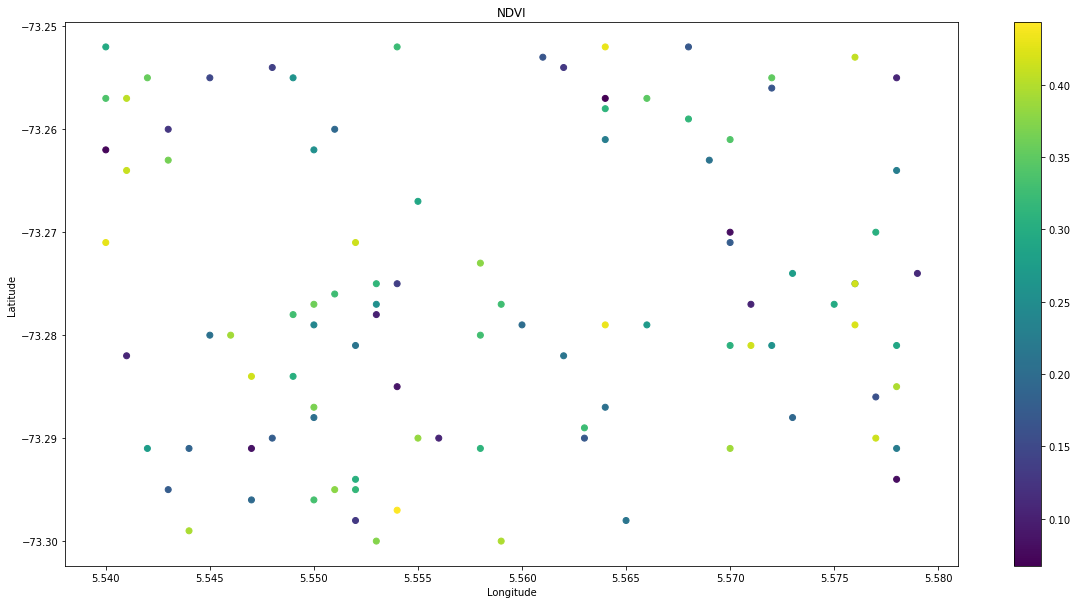

In [ ]:
x = Longitude
y = Latitude
colors = NDVI
plt.figure(figsize=(20,10))
plt.scatter(x, y, c=colors)
plt.title('NDVI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(); 

5-	Asignar al gráfico una forma al punto de acuerdo con el LST

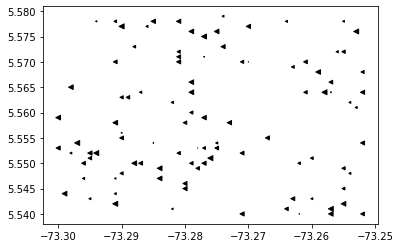

In [ ]:
plt.scatter(df1["Lat"], df1["Lon"], marker="<", color= "black", s=df1["LST"])
plt.show()

7-	Realice un boxplot para SMI

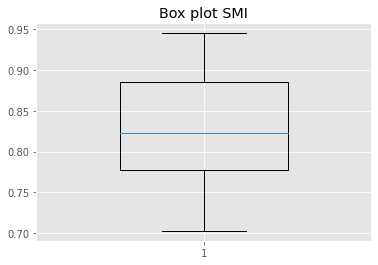

In [ ]:
plt.style.use('ggplot')
plt.boxplot(SMI, widths=(0.5))
plt.title("Box plot SMI")
plt.show()

8-	Realice un histograma para NDVI

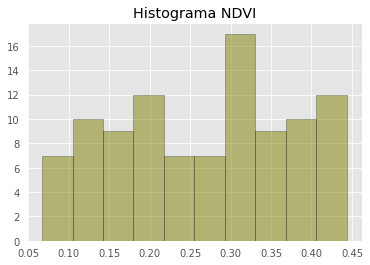

In [ ]:
plt.style.use('ggplot')
plt.hist(NDVI, color="olive", edgecolor = 'black', alpha = 0.5)
plt.title("Histograma NDVI", color="black")
plt.show()

9-	Grafique la densidad para LST

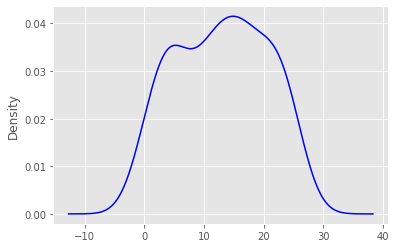

In [ ]:
df1['LST'].plot.kde(color="blue");

10-	Calcule estadísticas descriptivas para las 3 variables 

In [ ]:
df1.describe()

,Lat,Lon,SMI,NDVI,LST,Posición
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-73.275960,5.558710,0.825990,0.267627,12.933873,49.500000
std,0.014412,0.012015,0.067559,0.107492,7.549151,29.011492
min,-73.300000,5.540000,0.702849,0.067377,0.064006,0.000000
25%,-73.288250,5.549750,0.777848,0.177916,5.497107,24.750000
50%,-73.278000,5.557000,0.823359,0.283743,13.590302,49.500000
75%,-73.262000,5.570000,0.885675,0.357188,18.775807,74.250000
max,-73.252000,5.579000,0.944901,0.443274,25.550529,99.000000


11-	Fracciones los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante

In [ ]:
I = df1.iloc[:25]
II = df1.iloc[25:50]
III = df1.iloc[50:75]
IV = df1.iloc[75:]
average = ((I['Lat'].mean()), (II['Lat'].mean()), (III['Lat'].mean()), (IV['Lat'].mean()) )
print(average)

med = ((I['Lat'].median()), (II['Lat'].median()), (III['Lat'].median()), (IV['Lat'].mean())  )
print(med)

standard_deviation = ((I['Lat'].std()), (II['Lat'].std()), (III['Lat'].std()), (IV['Lat'].std()) )
print(standard_deviation)

(-73.27559999999988, -73.2751599999999, -73.27363999999989, -73.2794399999999)
(-73.27699999999989, -73.2789999999999, -73.27499999999988, -73.2794399999999)
(0.015063753405736353, 0.013511353250818738, 0.013735234496304325, 0.015481386673538716)


12-	Realice un boxplot para SMI que muestre las cajas de los 4 cuadrantes en el mismo gráfico

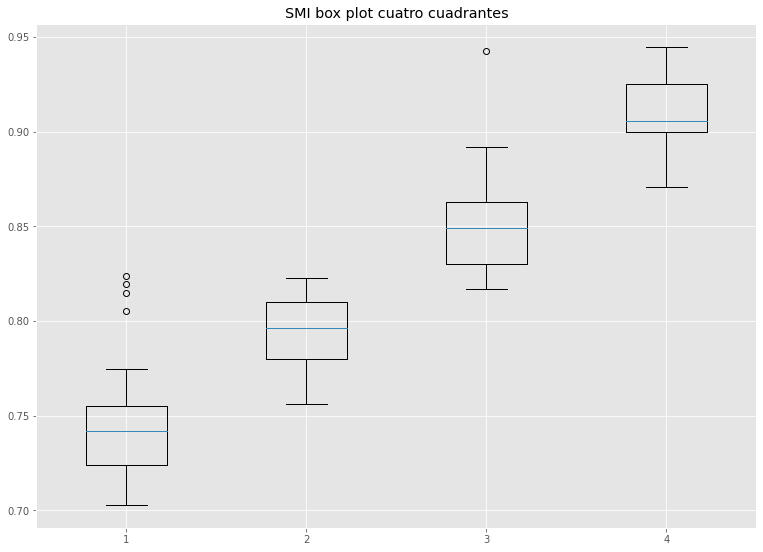

In [ ]:
Data = ((I['SMI']), (II['SMI']), (III['SMI']), (IV['SMI']))
plt.style.use('ggplot')
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.title("SMI box plot cuatro cuadrantes")
bp = ax.boxplot(Data)

plt.show()

13-	Realice un histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)

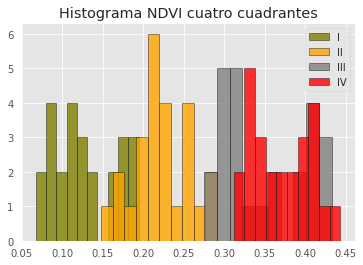

In [ ]:
Serie1= (I['NDVI'])
Serie2= (II['NDVI'])
Serie3= (III['NDVI'])
Serie4= (IV['NDVI'])

plt.style.use('ggplot')
plt.hist(Serie1, label='I', alpha=.8, edgecolor='black', color="olive")
plt.hist(Serie2, label='II', alpha=.8, edgecolor='black', color="orange")
plt.hist(Serie3, label='III', alpha=.8, edgecolor='black', color="gray")
plt.hist(Serie4, label='IV', alpha=.8, edgecolor='black',color="red")

plt.title("Histograma NDVI cuatro cuadrantes")
plt.legend()
plt.show()

14-	Realice un gráfico de densidades múltiple para LST que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo las densidades)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

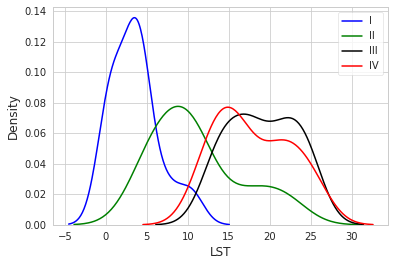

In [ ]:
sns.set_style('whitegrid')
g=sns.distplot((I['LST']),hist=False, color = "blue", label = 'I')
sns.distplot((II['LST']), hist=False, color = "green", label = 'II')
sns.distplot((III['LST']), hist=False, color = "black", label = 'III')
sns.distplot((IV['LST']), hist=False, color = "red", label = 'IV')
g.legend()

15-	Construya una matriz de correlaciones de Pearson para las 5 variables

In [ ]:
matriz= df1.corr()
matrizI =I.corr()
matrizII=II.corr()
matrizIII=III.corr()
matrizIV=IV.corr()

16-	Realice un gráfico de correlaciones para las 5 variables

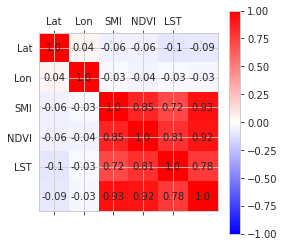

In [ ]:
plt.matshow(matriz,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matriz.columns)):
  for j in range(len(matriz.columns)):
    plt.text(i, j, round(matriz.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

17-	Fraccione el gráfico de correlaciones por cuadrante y muestre las 4 figuras en un solo gráfico

Cuadrante I

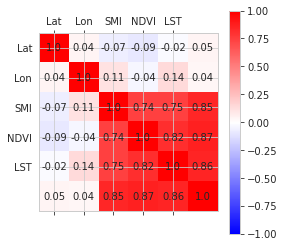

In [ ]:
CorI= plt.matshow(matrizI,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizI.columns)):
  for j in range(len(matrizI.columns)):
    plt.text(i, j, round(matrizI.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

Cuadrante II

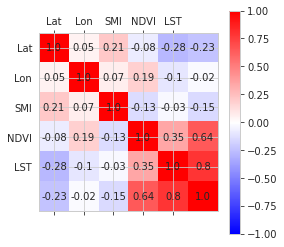

In [ ]:
CorII= plt.matshow(matrizII,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizII.columns)):
  for j in range(len(matrizII.columns)):
    plt.text(i, j, round(matrizII.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

Cuadrante III

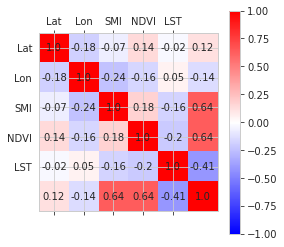

In [ ]:
CorIII= plt.matshow(matrizIII,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizIII.columns)):
  for j in range(len(matrizIII.columns)):
    plt.text(i, j, round(matrizIII.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

Cuadrante IV

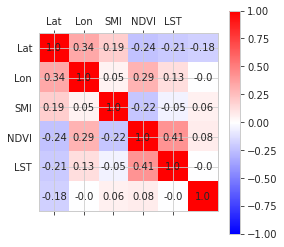

In [ ]:
CorIV=plt.matshow(matrizIV,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizIV.columns)):
  for j in range(len(matrizIV.columns)):
    plt.text(i, j, round(matrizIV.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

Correlaciones correspondientes

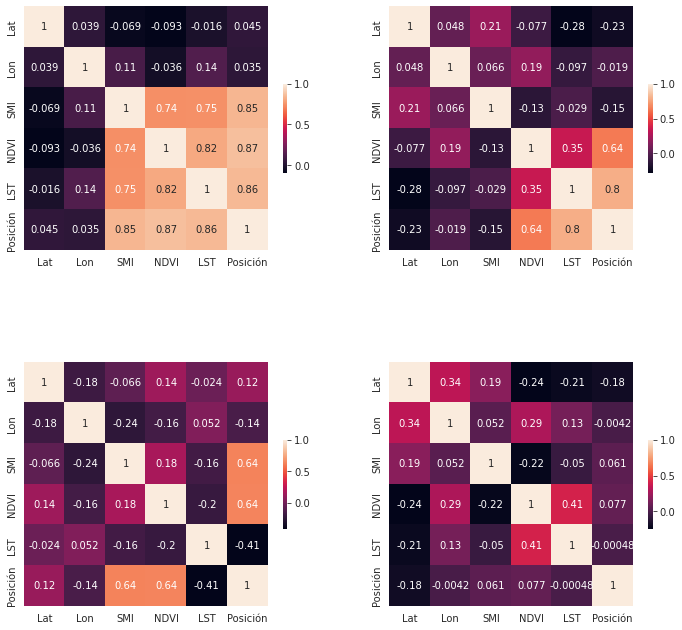

In [ ]:
fig=plt.figure(figsize=[12,12])
ax1=fig.add_subplot (2,2,1)
ax2=fig.add_subplot (2,2,2)
ax3=fig.add_subplot (2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.heatmap  (matrizI, annot=True, ax=ax1, square=True, cbar_kws={"shrink":.3})
sns.heatmap (matrizII, annot=True, ax=ax2, square=True, cbar_kws={"shrink":.3})
sns.heatmap(matrizIII, annot=True, ax=ax3, square=True, cbar_kws={"shrink":.3})
sns.heatmap (matrizIV, annot=True, ax=ax4, square=True, cbar_kws={"shrink":.3})

18-	Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST

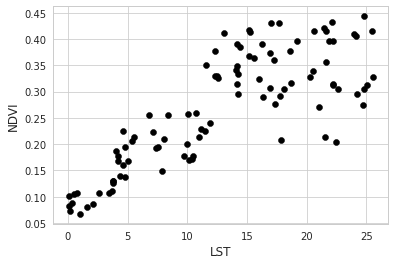

In [ ]:
df1
plt.ylabel("NDVI")
plt.xlabel("LST")
plt.scatter(df1["LST"],df1["NDVI"],color="black")
plt.show()


In [ ]:
from sklearn import linear_model
regresion= linear_model.LinearRegression()
VectorLST=df1["LST"].values.reshape((-1,1))
modelo = regresion.fit(VectorLST,df1["NDVI"])
print("Interseccion(b)",modelo.intercept_)
print("Pendiente (m)",modelo.coef_)

ValoresLST =[[0],[7],[11],[16],[19],[27],[30]]
modelo.predict(ValoresLST)

Interseccion(b) 0.11893885552234651
Pendiente (m) [0.01149606]


array([0.11893886, 0.1994113 , 0.24539556, 0.30287588, 0.33736407,
       0.42933259, 0.46382078])

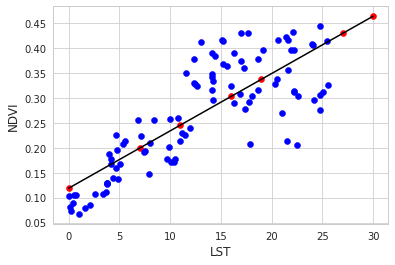

In [ ]:
plt.scatter(ValoresLST, modelo.predict(ValoresLST), color="red")
plt.plot(ValoresLST, modelo.predict(ValoresLST),color="black")
plt.ylabel("NDVI")
plt.xlabel("LST")
plt.scatter(df1["LST"],df1["NDVI"],color="blue")
plt.show()

19-	Ajuste un modelo de regresión multiple entre NDVI (respuesta) con  LST y SMI

In [ ]:
Multiple = smf.ols("NDVI ~ LST + SMI",df1)
result= Multiple.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NDVI   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     200.8
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           3.28e-35
Time:                        03:40:52   Log-Likelihood:                 163.50
No. Observations:                 100   AIC:                            -321.0
Df Residuals:                      97   BIC:                            -313.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5461      0.077     -7.131      0.000      -0.698      -0.394
LST            0.0058      0.001      6.283      0.000       0.004       0.008
SMI            0.8951      0.102      8.752      0.000       0.692       1.098
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.779
Skew:                           0.322   Prob(JB):                        0.411
Kurtosis:                       3.111   Cond. No.                         399.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

20-	Tome una muestra del 80% del data.frame y calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos.

In [ ]:
df80= df1.sample(frac=.8)
I80 =I.sample(frac=.8)
II80=II.sample(frac=.8)
III80=III.sample(frac=.8)
IV80=IV.sample(frac=.8)

#Matriz
matriz8= df80.corr()
matrizI8 =I80.corr()
matrizII8=II80.corr()
matrizIII8=III80.corr()
matrizIV8=IV80.corr()

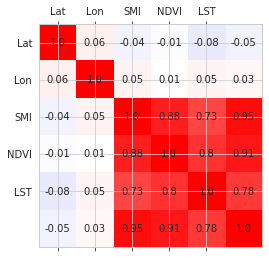

In [ ]:
Cor8= plt.matshow(matriz8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matriz8.columns)):
  for j in range(len(matriz8.columns)):
    plt.text(i, j, round(matriz8.iloc[i,j],2),
             ha="center",va="center")

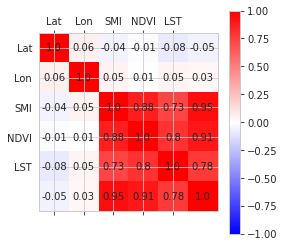

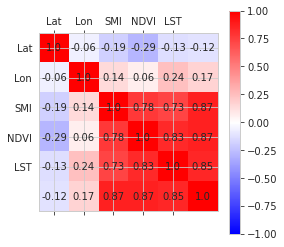

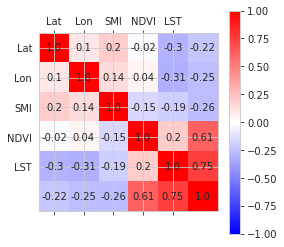

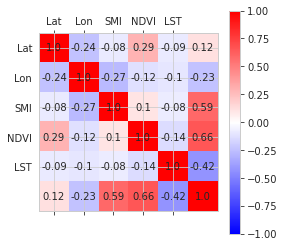

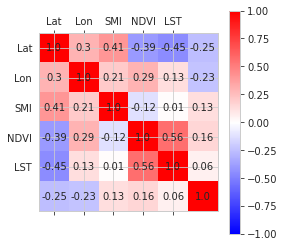

In [ ]:
#Fraccionando grafico 80%

Cor8= plt.matshow(matriz8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matriz8.columns)):
  for j in range(len(matriz8.columns)):
    plt.text(i, j, round(matriz8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()
# I
Cor8I= plt.matshow(matrizI8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizI8.columns)):
  for j in range(len(matrizI8.columns)):
    plt.text(i, j, round(matrizI8.iloc[i,j],2),
             ha="center",va="center")


plt.colorbar()
plt.show()
#II    
Cor8II= plt.matshow(matrizII8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizII8.columns)):
  for j in range(len(matrizII8.columns)):
    plt.text(i, j, round(matrizII8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()
#III
Cor8III= plt.matshow(matrizIII8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizIII8.columns)):
  for j in range(len(matrizIII8.columns)):
    plt.text(i, j, round(matrizIII8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()
# IV
Cor8IV=plt.matshow(matrizIV8,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizIV8.columns)):
  for j in range(len(matrizIV8.columns)):
    plt.text(i, j, round(matrizIV8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()

21-	Haga un gráfico 3D para las 3 variables ambientales

In [ ]:
df1.rename(columns={'A':SMI, 'B':NDVI, 'C':LST}, inplace=True)

In [ ]:
df1['cuadrante'] = 0

In [ ]:
df1['cuadrante'][:25] = 1
df1['cuadrante'][25:50] = 2
df1['cuadrante'][50:75] = 3
df1['cuadrante'][75:] = 4

In [ ]:
df1.head()

,Lat,Lon,SMI,NDVI,LST,Posición
0,-73.277,5.571,0.717968,0.105301,0.501482,0
1,-73.285,5.554,0.711805,0.088773,0.381553,1
2,-73.262,5.540,0.727399,0.072618,0.203290,2
3,-73.278,5.553,0.724134,0.102362,0.064006,3
4,-73.294,5.578,0.702849,0.080127,1.630114,4


In [ ]:
px.scatter_3d(data_frame = df1, x = 'SMI', y = 'NDVI', z = 'LST', size_max=2)

22-	Haga un gráfico 3D para las 3 variables ambientales y asigne el color según el cuadrante.

In [ ]:
px.scatter_3d(data_frame = df1, x = 'SMI', y = 'NDVI', z = 'LST', color = 'cuadrante')

23-	Matriz de distancias


Usando el modulo **scipy.spatial** encontramos la función **distance_matrix**

In [ ]:
d_matrix = sp.distance_matrix(x = df1[['Lon', 'Lat']], y = df1[['Lon', 'Lat']])

In [ ]:
d_matrix

array([[0.        , 0.01878829, 0.03443835, ..., 0.01442221, 0.021     ,
        0.01431782],
       [0.01878829, 0.        , 0.02692582, ..., 0.00984886, 0.00894427,
        0.0235372 ],
       [0.03443835, 0.02692582, 0.        , ..., 0.0354683 , 0.01802776,
        0.04640043],
       ...,
       [0.01442221, 0.00984886, 0.0354683 , ..., 0.        , 0.01769181,
        0.01403567],
       [0.021     , 0.00894427, 0.01802776, ..., 0.01769181, 0.        ,
        0.02996665],
       [0.01431782, 0.0235372 , 0.04640043, ..., 0.01403567, 0.02996665,
        0.        ]])

24. Ubique el centroide en la nube de puntos de las coordenadas y selecciones los puntos en una ventana de radio a lo sumo igual a 2/3 de la máxima distancia en la matrix de distancias

In [ ]:
distancia_maxima = d_matrix.max()
distancia_maxima

0.05663920903418241

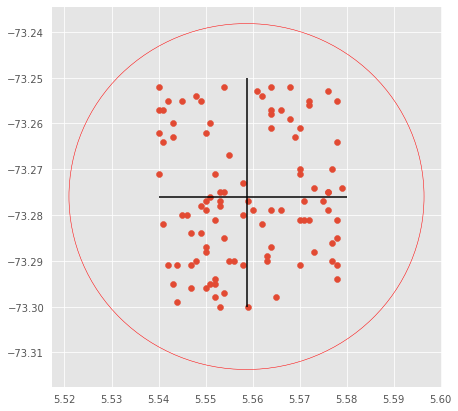

In [ ]:
circle1 = plt.Circle((df1['Lon'].mean(), df1['Lat'].mean()), distancia_maxima*(2/3), color='r', fill = False)
fig, ax = plt.subplots(1,1,figsize =  (7,7))
ax.scatter(df1['Lon'], df1['Lat'])
plt.vlines(df1['Lon'].mean(), -73.3, -73.25)
plt.hlines(df1['Lat'].mean(), 5.54, 5.58)
ax.add_patch(circle1)